In [1]:
import numpy as np
import pandas as pd 

df = pd.read_csv('Downloads/winequalityN.csv')
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4122,white,6.2,0.34,0.25,12.1,0.059,33.0,171.0,0.99769,3.14,0.56,8.7,6
2292,white,6.5,0.32,0.23,1.2,0.054,39.0,208.0,0.99272,3.18,0.46,9.9,6
2679,white,7.6,0.18,0.28,7.1,0.041,29.0,110.0,0.99652,3.20,0.42,9.2,6
3798,white,7.9,0.21,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,5
3934,white,7.3,0.27,0.30,1.3,0.040,26.0,84.0,0.99222,3.28,0.53,10.7,6


In [2]:
#drop null rows
df = df.dropna()

In [3]:
#convert all variables to numeric
df['is_white_wine'] = [
    1 if typ == 'white' else 0 for typ in df['type']
]
df.drop('type', axis=1, inplace=True)

In [4]:
#convert to binary variable
df['is_good_wine'] = [
    1 if quality >= 6 else 0 for quality in df['quality']
]
df.drop('quality', axis=1, inplace=True)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white_wine,is_good_wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('is_good_wine', axis=1)
y = df['is_good_wine']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, random_state=42
)

In [6]:
#inbalance in types of variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
import tensorflow as tf
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=100)

C:\Users\user\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
162/162 [==============================] - 1s 2ms/step - loss: 0.6184 - accuracy: 0.7124 - precision: 0.7464 - recall: 0.8280
Epoch 2/100
162/162 [==============================] - 0s 2ms/step - loss: 0.5343 - accuracy: 0.7335 - precision: 0.7523 - recall: 0.8646
Epoch 3/100
162/162 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.7547 - precision: 0.7782 - recall: 0.8579
Epoch 4/100
162/162 [==============================] - 0s 2ms/step - loss: 0.5072 - accuracy: 0.7557 - precision: 0.7979 - recall: 0.8235
Epoch 5/100
162/162 [==============================] - 0s 3ms/step - loss: 0.5101 - accuracy: 0.7569 - precision: 0.7883 - recall: 0.8433
Epoch 6/100
162/162 [==============================] - 0s 2ms/step - loss: 0.5061 - accuracy: 0.7511 - precision: 0.7797 - recall: 0.8470
Epoch 7/100
162/162 [==============================] - 0s 2ms/step - loss: 0.5054 - accuracy: 0.7634 - precision: 0.8055 - recall: 0.8268
Epoch 8/100
162/162 [=============

In [8]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

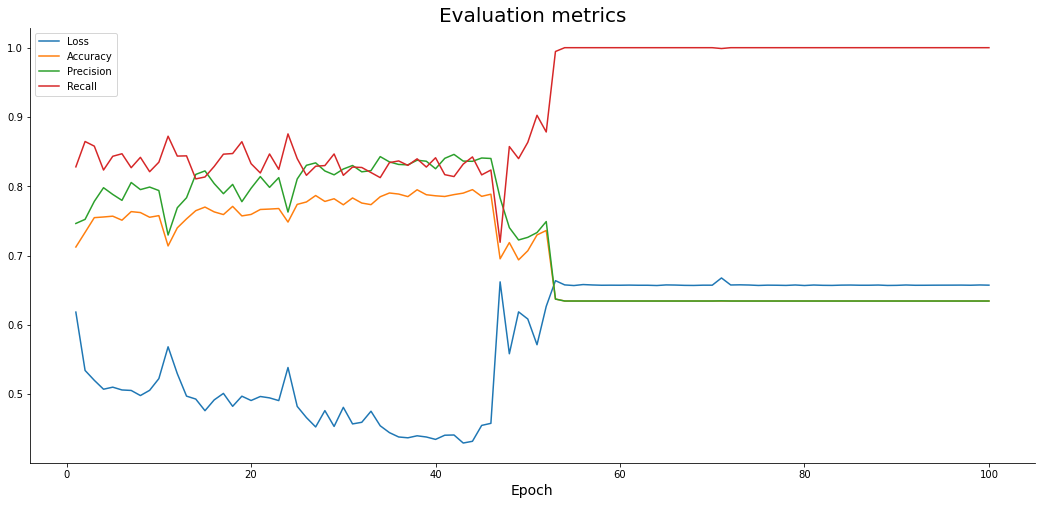

In [9]:
plt.plot(
    np.arange(1, 101), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

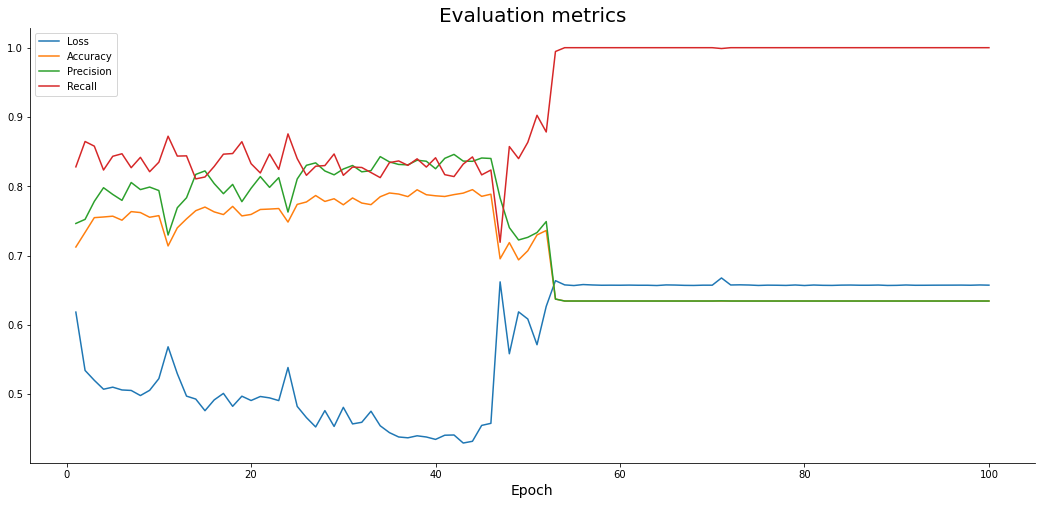

In [10]:
plt.plot(
    np.arange(1, 101), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [11]:
predictions = model.predict(X_test_scaled)

In [12]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

In [13]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_classes))

[[  0 482]
 [  0 811]]


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.63
Precision: 0.63
Recall: 1.00
